In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


def f(x):
    if x < 1:
        return f"1/{int(1/x)}"
    else:
        return int(x)

In [2]:
data = pd.read_csv("summary_1023_2.csv")
data = data.query(f"targetname != 'samples/test_locks_10_true-unreach-call.c'")

In [3]:
data

,targetname,theory,bitwidth,lia2bv,id,safety,time,timeout,error_kind,time_verify,...,time_process_lia,time_to_lia,time_from_lia,total_sizes_interp,num_smt,num_interp,num_boxing,num_boxing_multi_variable,num_interp_failure,zipname
0,samples/nfm2017/benchmarks/VeriMAP_bench/DAGGE...,lia,0,dummy,0,safe,21.744573,0,NaN,20.361911,...,0.005951,0.000000,0.000000,1024.0,6280.0,33.0,0.0,0.0,0.0,20191023104220-172-31-12-181_f7b126ffd6b3_inte...
1,samples/nfm2017/benchmarks/svcomp16/loops/sum0...,lia,0,dummy,0,safe,1.612478,0,NaN,0.756442,...,0.000925,0.000000,0.000000,104.0,208.0,4.0,0.0,0.0,0.0,20191023104204-172-31-27-155_17ddc4cfe902_inte...
2,samples/nfm2017/benchmarks/svcomp16/loop-accel...,lia,0,dummy,0,safe,2.027562,0,NaN,0.131551,...,0.000104,0.000000,0.000000,11.0,31.0,2.0,0.0,0.0,0.0,20191023104723-172-31-11-57_72573b907ea2_inter...
3,samples/nfm2017/benchmarks/VeriMAP_bench/DAGGE...,lia,0,dummy,0,safe,95.186685,0,NaN,94.139503,...,0.014149,0.000000,0.000000,2952.0,22629.0,82.0,0.0,0.0,0.0,20191023104332-172-31-4-156_785abd9e2b1e_inter...
4,samples/nfm2017/benchmarks/VeriMAP_bench/DAGGE...,liabv,8,naive,0,NaN,600.232491,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191023105157-172-31-12-147_85b6f5d538aa_inte...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,lia,0,dummy,0,safe,0.906229,0,NaN,0.115121,...,0.000110,0.000000,0.000000,18.0,35.0,2.0,0.0,0.0,0.0,20191023103156-172-31-30-91_9b648e32700c_inter...
935,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,liabv,8,naive,0,safe,0.837222,0,NaN,0.051454,...,0.000049,0.000073,0.000346,5.0,9.0,1.0,0.0,0.0,0.0,20191023103151-172-31-3-145_dc8f6cecb6cc_inter...
936,samples/nfm2017/benchmarks/svcomp16/loop-new/c...,liabv,8,naive,0,safe,81.684629,0,NaN,80.884849,...,0.352400,0.023470,3.804409,16451.0,44442.0,34.0,0.0,0.0,0.0,20191023104329-172-31-7-103_a3dad3056a6b_inter...
937,samples/nfm2017/benchmarks/svcomp16/loop-lit/j...,liabv,8,boxing,0,NaN,600.110239,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191023105210-172-31-20-116_a43389e37775_inte...


# 横軸naiveの検証時間、縦軸bvの検証時間のscatter plot

In [4]:
data1 = data[data["theory"] == "liabv"]
data1

,targetname,theory,bitwidth,lia2bv,id,safety,time,timeout,error_kind,time_verify,...,time_process_lia,time_to_lia,time_from_lia,total_sizes_interp,num_smt,num_interp,num_boxing,num_boxing_multi_variable,num_interp_failure,zipname
4,samples/nfm2017/benchmarks/VeriMAP_bench/DAGGE...,liabv,8,naive,0,NaN,600.232491,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191023105157-172-31-12-147_85b6f5d538aa_inte...
7,samples/test5_.c,liabv,8,naive,0,unsafe,1.135964,0,NaN,0.373133,...,0.000841,0.000524,0.044055,189.0,96.0,4.0,0.0,0.0,0.0,20191023103151-172-31-9-115_5c9647bc76a4_inter...
8,samples/nfm2017/benchmarks/svcomp16/loop-lit/d...,liabv,8,naive,0,NaN,242.490867,0,MemoryError,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191023104618-172-31-12-59_57050c9b7ac5_inter...
9,samples/nfm2017/benchmarks/svcomp16/loops/term...,liabv,8,boxing,0,unsafe,0.951828,0,NaN,0.108030,...,0.000079,0.000237,0.000564,8.0,16.0,2.0,4.0,0.0,0.0,20191023104202-172-31-30-250_070790fb60ad_inte...
12,samples/nfm2017/benchmarks/svcomp16/loops/coun...,liabv,8,naive,0,unsafe,0.913795,0,NaN,0.054809,...,0.000014,0.000096,0.000003,0.0,3.0,1.0,0.0,0.0,0.0,20191023104206-172-31-28-186_c10a0c124463_inte...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,samples/nfm2017/benchmarks/svcomp16/loop-accel...,liabv,8,boxing,0,NaN,600.180421,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191023105654-172-31-18-83_0f8af6ce055a_inter...
935,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,liabv,8,naive,0,safe,0.837222,0,NaN,0.051454,...,0.000049,0.000073,0.000346,5.0,9.0,1.0,0.0,0.0,0.0,20191023103151-172-31-3-145_dc8f6cecb6cc_inter...
936,samples/nfm2017/benchmarks/svcomp16/loop-new/c...,liabv,8,naive,0,safe,81.684629,0,NaN,80.884849,...,0.352400,0.023470,3.804409,16451.0,44442.0,34.0,0.0,0.0,0.0,20191023104329-172-31-7-103_a3dad3056a6b_inter...
937,samples/nfm2017/benchmarks/svcomp16/loop-lit/j...,liabv,8,boxing,0,NaN,600.110239,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191023105210-172-31-20-116_a43389e37775_inte...


In [5]:
# pick targetnames whose error_kind are all NaN
targetnames = list(set(data1["targetname"]))
targetnames
pd.isnull(list(data1[data1["targetname"] == targetnames[0]]["error_kind"])[0])

True

In [6]:
targetnames1 = []
for i in targetnames:
    rows = data1[data1["targetname"] ==i]
    if all(pd.isnull(j) for j in rows["error_kind"]):
        targetnames1.append(i)

In [7]:
targetnames1

['samples/nfm2017/benchmarks/svcomp16/loops/terminator_03_false-unreach-call_true-termination.i.annot.c',
 'samples/nfm2017/benchmarks/svcomp16/loop-acceleration/multivar_true-unreach-call1.i.annot.c',
 'samples/nfm2017/benchmarks/VeriMAP_bench/INVGEN-svd1_VeriMAP_true.c',
 'samples/lock_small.c',
 'samples/nfm2017/benchmarks/VeriMAP_bench/TRACER-testwp2_VeriMAP_true.c',
 'samples/nfm2017/benchmarks/VeriMAP_bench/INVGEN-seq-len_VeriMAP_true.c',
 'samples/nfm2017/benchmarks/VeriMAP_bench/INVGEN-up2_VeriMAP_true.c',
 'samples/nfm2017/benchmarks/VeriMAP_bench/MAP-forward_VeriMAP_true.c',
 'samples/nfm2017/benchmarks/HOLA/19.c',
 'samples/nfm2017/benchmarks/VeriMAP_bench/TRACER-testwp3_VeriMAP_true.c',
 'samples/nfm2017/benchmarks/VeriMAP_bench/TRACER-testloop16_VeriMAP_true.c',
 'samples/nfm2017/benchmarks/VeriMAP_bench/DAGGER-efm_VeriMAP_true.c',
 'samples/test3.c',
 'samples/nfm2017/benchmarks/VeriMAP_bench/INVGEN-nested2_VeriMAP_true.c',
 'samples/nfm2017/benchmarks/VeriMAP_bench/TRACE

In [8]:
data1[data1["targetname"] == 'samples/nfm2017/benchmarks/VeriMAP_bench/DAGGER-lifo_VeriMAP_true.c']

,targetname,theory,bitwidth,lia2bv,id,safety,time,timeout,error_kind,time_verify,...,time_process_lia,time_to_lia,time_from_lia,total_sizes_interp,num_smt,num_interp,num_boxing,num_boxing_multi_variable,num_interp_failure,zipname
55,samples/nfm2017/benchmarks/VeriMAP_bench/DAGGE...,liabv,8,naive,0,NaN,600.113414,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191023104649-172-31-18-83_a374c401639a_inter...
332,samples/nfm2017/benchmarks/VeriMAP_bench/DAGGE...,liabv,8,boxing,0,NaN,600.039178,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191023104624-172-31-6-168_4af512ac7379_inter...


In [9]:
rows1 = []
for i in targetnames1:
    subtable = data1[data1["targetname"]==i]
    time_naive = float(subtable[subtable["lia2bv"] == "naive"]["time"])
    time_boxing = float(subtable[subtable["lia2bv"] == "boxing"]["time"])
    safety = list(subtable["safety"])[0]
    if safety != "safe" and safety != "unsafe":
        continue
    num_boxing = int(subtable[subtable["lia2bv"] == "boxing"]["num_boxing"])
    num_boxing_multi_variable = int(subtable[subtable["lia2bv"] == "boxing"]["num_boxing_multi_variable"])
    rows1.append({"targetname": i, "naive": time_naive, "boxing": time_boxing, "safety": safety, "num_boxing": num_boxing, "num_boxing_multi_variable": num_boxing_multi_variable})
#     print(rows1[-1])
# table1 = pd.DataFrame([list(x.values()) for x in rows1], columns={})
table1 = pd.DataFrame(rows1)
table1

,targetname,naive,boxing,safety,num_boxing,num_boxing_multi_variable
0,samples/nfm2017/benchmarks/svcomp16/loops/term...,0.891026,0.951828,unsafe,4,0
1,samples/nfm2017/benchmarks/svcomp16/loop-accel...,0.882187,2.082447,safe,0,0
2,samples/nfm2017/benchmarks/VeriMAP_bench/INVGE...,148.657984,30.846583,unsafe,978,171
3,samples/lock_small.c,3.578315,2.948922,safe,0,0
4,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,1.056183,1.011617,safe,12,0
...,...,...,...,...,...,...
146,samples/nfm2017/benchmarks/VeriMAP_bench/INVGE...,118.543326,24.876148,unsafe,1013,218
147,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,1.672355,1.960466,safe,176,0
148,samples/nfm2017/benchmarks/svcomp16/loop-accel...,3.145785,2.067919,unsafe,243,0
149,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,1.781811,1.915244,safe,768,0


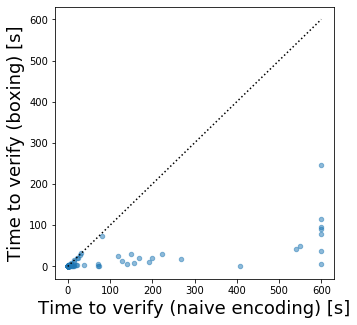

In [10]:
#table1 = table1.query("safety == 'safe' or safety == 'unsafe'")
table1.plot.scatter(x='naive', y='boxing', alpha=0.5, figsize=(5, 5))
import numpy as np
xmin = 0
xmax = 600
dx = 100
x = np.arange(xmin, xmax+dx, dx)
y = x
p = plt.plot(x, y, "blue", linestyle='dotted', color="black")
plt.xlabel("Time to verify (naive encoding) [s]", fontsize=18)
plt.ylabel("Time to verify (boxing) [s]", fontsize=18)
# plt.show()
plt.savefig("scatter_naive_boxing.pdf", bbox_inches="tight")

In [11]:
table1.sort_values("naive")

,targetname,naive,boxing,safety,num_boxing,num_boxing_multi_variable
113,samples/test1_.c,0.739887,0.740070,safe,0,0
130,samples/test1.c,0.744798,0.741657,unsafe,0,0
86,samples/test2.c,0.766575,0.815710,unsafe,0,0
82,samples/test3__.c,0.793868,0.800611,unsafe,0,0
79,samples/test3_.c,0.797669,0.786116,unsafe,0,0
...,...,...,...,...,...,...
16,samples/nfm2017/benchmarks/VeriMAP_bench/INVGE...,600.115758,37.836910,safe,2157,312
122,samples/nfm2017/benchmarks/VeriMAP_bench/INVGE...,600.116547,246.275543,safe,5151,640
58,samples/nfm2017/benchmarks/VeriMAP_bench/DAGGE...,600.126366,7.115521,unsafe,478,108
94,samples/nfm2017/benchmarks/HOLA/01.c,600.219338,90.603812,unsafe,4800,4708


In [12]:
table1["acceleration"] = table1["naive"]/table1["boxing"]
table1

,targetname,naive,boxing,safety,num_boxing,num_boxing_multi_variable,acceleration
0,samples/nfm2017/benchmarks/svcomp16/loops/term...,0.891026,0.951828,unsafe,4,0,0.936121
1,samples/nfm2017/benchmarks/svcomp16/loop-accel...,0.882187,2.082447,safe,0,0,0.423630
2,samples/nfm2017/benchmarks/VeriMAP_bench/INVGE...,148.657984,30.846583,unsafe,978,171,4.819269
3,samples/lock_small.c,3.578315,2.948922,safe,0,0,1.213432
4,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,1.056183,1.011617,safe,12,0,1.044055
...,...,...,...,...,...,...,...
146,samples/nfm2017/benchmarks/VeriMAP_bench/INVGE...,118.543326,24.876148,unsafe,1013,218,4.765341
147,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,1.672355,1.960466,safe,176,0,0.853039
148,samples/nfm2017/benchmarks/svcomp16/loop-accel...,3.145785,2.067919,unsafe,243,0,1.521233
149,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,1.781811,1.915244,safe,768,0,0.930331


In [13]:
rows1_rate = []
for i in range(-8, 20):
    rows1_rate.append({"bound_acceleration": 2**(i/4), "target_programs": len(table1.query(f"acceleration > {2**(i/4)}"))})
table1_rate = pd.DataFrame(rows1_rate)
table1_rate

,bound_acceleration,target_programs
0,0.250000,151
1,0.297302,151
2,0.353553,151
3,0.420448,150
4,0.500000,147
5,0.594604,147
6,0.707107,147
7,0.840896,145
8,1.000000,97
9,1.189207,54


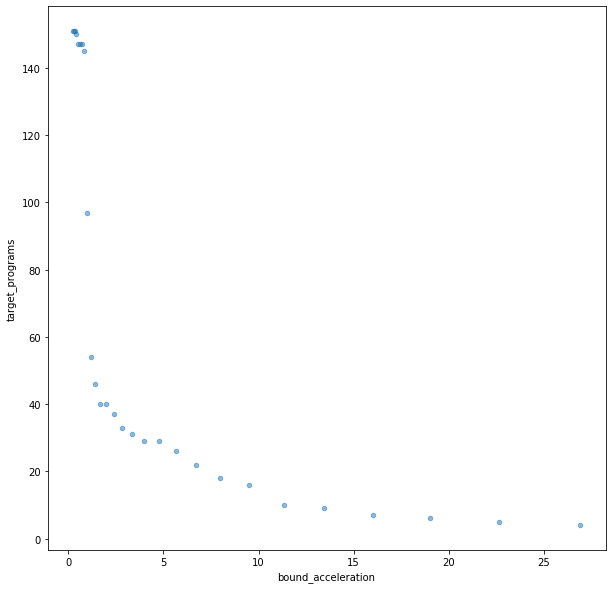

In [14]:
table1_rate.plot.scatter(x='bound_acceleration', y='target_programs', alpha=0.5, figsize=(10, 10))
plt.show()

In [15]:
table1.mean()

naive                         54.290184
boxing                         8.855828
num_boxing                   654.622517
num_boxing_multi_variable     99.410596
acceleration                   5.365662
dtype: float64

In [16]:
table1.query("naive < boxing")

,targetname,naive,boxing,safety,num_boxing,num_boxing_multi_variable,acceleration
0,samples/nfm2017/benchmarks/svcomp16/loops/term...,0.891026,0.951828,unsafe,4,0,0.936121
1,samples/nfm2017/benchmarks/svcomp16/loop-accel...,0.882187,2.082447,safe,0,0,0.423630
5,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,0.953500,1.293398,safe,32,0,0.737205
12,samples/nfm2017/benchmarks/svcomp16/loops/for_...,1.047037,1.068860,safe,0,0,0.979583
13,samples/nfm2017/benchmarks/svcomp16/loop-new/c...,0.906068,0.908582,unsafe,0,0,0.997233
14,samples/test5.c,1.101925,1.116838,unsafe,35,0,0.986647
15,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,0.916290,0.949345,safe,0,0,0.965182
17,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,28.038766,28.141230,safe,24,0,0.996359
24,samples/nfm2017/benchmarks/llreve/loop4_merged...,1.050674,1.121540,safe,0,0,0.936814
29,samples/nfm2017/benchmarks/svcomp16/loops/term...,0.891257,0.891999,unsafe,0,0,0.999169


In [17]:
table1["rate_valid_boxing"] = table1["num_boxing_multi_variable"]/table1["num_boxing"]
table1 = table1.fillna({"rate_valid_boxing": 0})
table1

,targetname,naive,boxing,safety,num_boxing,num_boxing_multi_variable,acceleration,rate_valid_boxing
0,samples/nfm2017/benchmarks/svcomp16/loops/term...,0.891026,0.951828,unsafe,4,0,0.936121,0.000000
1,samples/nfm2017/benchmarks/svcomp16/loop-accel...,0.882187,2.082447,safe,0,0,0.423630,0.000000
2,samples/nfm2017/benchmarks/VeriMAP_bench/INVGE...,148.657984,30.846583,unsafe,978,171,4.819269,0.174847
3,samples/lock_small.c,3.578315,2.948922,safe,0,0,1.213432,0.000000
4,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,1.056183,1.011617,safe,12,0,1.044055,0.000000
...,...,...,...,...,...,...,...,...
146,samples/nfm2017/benchmarks/VeriMAP_bench/INVGE...,118.543326,24.876148,unsafe,1013,218,4.765341,0.215202
147,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,1.672355,1.960466,safe,176,0,0.853039,0.000000
148,samples/nfm2017/benchmarks/svcomp16/loop-accel...,3.145785,2.067919,unsafe,243,0,1.521233,0.000000
149,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,1.781811,1.915244,safe,768,0,0.930331,0.000000


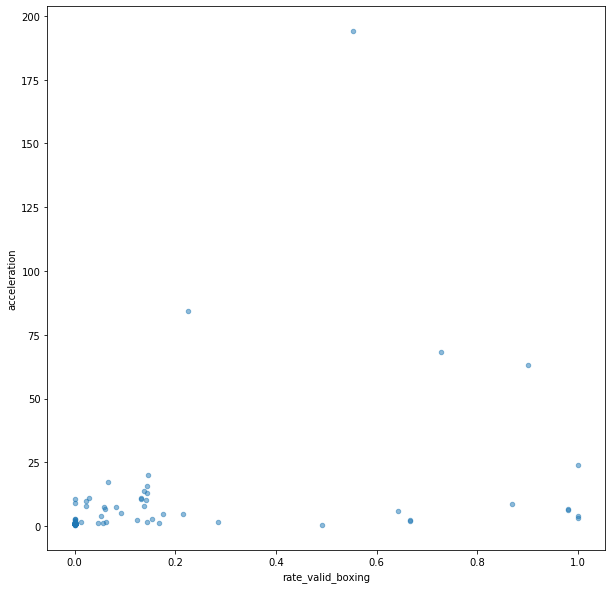

In [18]:
#table1 = table1.query("safety == 'safe' or safety == 'unsafe'")
table1.plot.scatter(x='rate_valid_boxing', y='acceleration', alpha=0.5, figsize=(10, 10))
import numpy as np
# xmin = 0
# xmax = 600
# dx = 100
# x = np.arange(xmin, xmax+dx, dx)
# y = x
# p = plt.plot(x, y, "blue", linestyle='dotted', color="black")
# plt.xlabel("Time to verify (naive encoding) [s]")
# plt.ylabel("Time to verify (boxing) [s]")
plt.show()

In [19]:
table1.query("naive < boxing")

,targetname,naive,boxing,safety,num_boxing,num_boxing_multi_variable,acceleration,rate_valid_boxing
0,samples/nfm2017/benchmarks/svcomp16/loops/term...,0.891026,0.951828,unsafe,4,0,0.936121,0.000000
1,samples/nfm2017/benchmarks/svcomp16/loop-accel...,0.882187,2.082447,safe,0,0,0.423630,0.000000
5,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,0.953500,1.293398,safe,32,0,0.737205,0.000000
12,samples/nfm2017/benchmarks/svcomp16/loops/for_...,1.047037,1.068860,safe,0,0,0.979583,0.000000
13,samples/nfm2017/benchmarks/svcomp16/loop-new/c...,0.906068,0.908582,unsafe,0,0,0.997233,0.000000
14,samples/test5.c,1.101925,1.116838,unsafe,35,0,0.986647,0.000000
15,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,0.916290,0.949345,safe,0,0,0.965182,0.000000
17,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,28.038766,28.141230,safe,24,0,0.996359,0.000000
24,samples/nfm2017/benchmarks/llreve/loop4_merged...,1.050674,1.121540,safe,0,0,0.936814,0.000000
29,samples/nfm2017/benchmarks/svcomp16/loops/term...,0.891257,0.891999,unsafe,0,0,0.999169,0.000000


In [20]:
len(table1.query("naive < boxing"))

54

In [21]:
import math
rows1_rate = []
fine = 4
r = [i/fine for i in range(-1*fine, 8*fine + 1)]

rows1_rate.append({"bound_acceleration": 2**r[0], "target_programs": len(table1.query(f"acceleration <= {2**(r[0]+1/fine/2)}"))})
for i in r[1:]:
#     print(2**i)
    rows1_rate.append({"bound_acceleration": 2**i, "target_programs": len(table1.query(f"{2**(i-1/fine/2)} < acceleration and acceleration <= {2**(i+1/fine/2)}"))})
ind1 = [f"x{f(2**i)}" if n%fine==0 else ""  for n, i in enumerate(r)]
table1_rate = pd.DataFrame(rows1_rate, index=ind1)
table1_rate

,bound_acceleration,target_programs
x1/2,0.500000,4
,0.594604,0
,0.707107,2
,0.840896,5
x1,1.000000,82
,1.189207,7
,1.414214,9
,1.681793,2
x2,2.000000,2
,2.378414,3


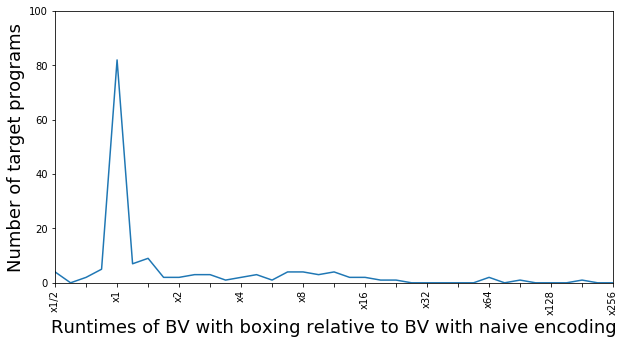

In [22]:
table1_rate["target_programs"].plot.line(x=table1_rate["bound_acceleration"], figsize=(10, 5), ylim=[0,100])
plt.xlabel("Runtimes of BV with boxing relative to BV with naive encoding", fontsize=18)
plt.ylabel("Number of target programs", fontsize=18)
t = 1/2
# plt.rcParams["font.size"] = 18
plt.xticks([n for n, i in enumerate(r) if n % (fine*t) == 0], [i for n, i in enumerate(ind1) if n % (fine*t) == 0], rotation=90)
# plt.show()
plt.savefig("line_runtime_naive_boxing.pdf", bbox_inches="tight")

In [23]:
table1_rate.sum()

bound_acceleration    1606.372051
target_programs        151.000000
dtype: float64

In [24]:
# import math
# rows1_rate = []
# fine = 4
# r = [i/fine for i in range(-1*fine, 8*fine + 1)]

# rows1_rate.append({"bound_acceleration": 2**r[0], "target_programs": len(table1.query(f"safety == 'unsafe' and acceleration <= {2**(r[0]+1/fine/2)}"))})
# for i in r[1:]:
# #     print(2**i)
#     rows1_rate.append({"bound_acceleration": 2**i, "target_programs": len(table1.query(f"safety == 'unsafe' and {2**(i-1/fine/2)} < acceleration and acceleration <= {2**(i+1/fine/2)}"))})
# ind1 = [f"x{f(2**i)}" if n%fine==0 else ""  for n, i in enumerate(r)]
# table1_rate = pd.DataFrame(rows1_rate, index=ind1)
# table1_rate

In [25]:
# table1_rate["target_programs"].plot.line(x=table1_rate["bound_acceleration"], figsize=(10, 5), ylim=[0,60])
# plt.xlabel("Runtimes of BV with boxing relative to BV with naive encoding", fontsize=18)
# plt.ylabel("Number of target programs", fontsize=18)
# t = 1/2
# # plt.rcParams["font.size"] = 18
# plt.xticks([n for n, i in enumerate(r) if n % (fine*t) == 0], [i for n, i in enumerate(ind1) if n % (fine*t) == 0], rotation=90)
# plt.show()
# # plt.savefig("line_runtime_naive_boxing.pdf", bbox_inches="tight")

In [26]:
table1.query("acceleration < 2")

,targetname,naive,boxing,safety,num_boxing,num_boxing_multi_variable,acceleration,rate_valid_boxing
0,samples/nfm2017/benchmarks/svcomp16/loops/term...,0.891026,0.951828,unsafe,4,0,0.936121,0.0
1,samples/nfm2017/benchmarks/svcomp16/loop-accel...,0.882187,2.082447,safe,0,0,0.423630,0.0
3,samples/lock_small.c,3.578315,2.948922,safe,0,0,1.213432,0.0
4,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,1.056183,1.011617,safe,12,0,1.044055,0.0
5,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,0.953500,1.293398,safe,32,0,0.737205,0.0
...,...,...,...,...,...,...,...,...
145,samples/nfm2017/benchmarks/svcomp16/loops/sum0...,1.105866,1.050491,safe,14,0,1.052713,0.0
147,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,1.672355,1.960466,safe,176,0,0.853039,0.0
148,samples/nfm2017/benchmarks/svcomp16/loop-accel...,3.145785,2.067919,unsafe,243,0,1.521233,0.0
149,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,1.781811,1.915244,safe,768,0,0.930331,0.0


# 結果が同じもののうち、横軸LIAの検証時間、縦軸bvの検証時間

In [27]:
data2 = data[data["lia2bv"] != "naive"]
data2

,targetname,theory,bitwidth,lia2bv,id,safety,time,timeout,error_kind,time_verify,...,time_process_lia,time_to_lia,time_from_lia,total_sizes_interp,num_smt,num_interp,num_boxing,num_boxing_multi_variable,num_interp_failure,zipname
0,samples/nfm2017/benchmarks/VeriMAP_bench/DAGGE...,lia,0,dummy,0,safe,21.744573,0,NaN,20.361911,...,0.005951,0.000000,0.000000,1024.0,6280.0,33.0,0.0,0.0,0.0,20191023104220-172-31-12-181_f7b126ffd6b3_inte...
1,samples/nfm2017/benchmarks/svcomp16/loops/sum0...,lia,0,dummy,0,safe,1.612478,0,NaN,0.756442,...,0.000925,0.000000,0.000000,104.0,208.0,4.0,0.0,0.0,0.0,20191023104204-172-31-27-155_17ddc4cfe902_inte...
2,samples/nfm2017/benchmarks/svcomp16/loop-accel...,lia,0,dummy,0,safe,2.027562,0,NaN,0.131551,...,0.000104,0.000000,0.000000,11.0,31.0,2.0,0.0,0.0,0.0,20191023104723-172-31-11-57_72573b907ea2_inter...
3,samples/nfm2017/benchmarks/VeriMAP_bench/DAGGE...,lia,0,dummy,0,safe,95.186685,0,NaN,94.139503,...,0.014149,0.000000,0.000000,2952.0,22629.0,82.0,0.0,0.0,0.0,20191023104332-172-31-4-156_785abd9e2b1e_inter...
5,samples/mod3.c,lia,0,dummy,0,safe,0.902626,0,NaN,0.132467,...,0.000306,0.000000,0.000000,13.0,37.0,2.0,0.0,0.0,0.0,20191023110220-172-31-23-87_8923c568cdd1_inter...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,samples/nfm2017/benchmarks/svcomp16/locks/test...,liabv,8,boxing,0,unsafe,14.928531,0,NaN,9.605460,...,0.014106,0.044581,0.180132,4061.0,5177.0,35.0,0.0,0.0,0.0,20191023105220-172-31-5-61_930ddeb21e0d_interp...
931,samples/nfm2017/benchmarks/HOLA/15.c,liabv,8,boxing,0,NaN,600.154551,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191023111108-172-31-10-244_a281efaec763_inte...
933,samples/nfm2017/benchmarks/svcomp16/loop-accel...,liabv,8,boxing,0,NaN,600.180421,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191023105654-172-31-18-83_0f8af6ce055a_inter...
934,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,lia,0,dummy,0,safe,0.906229,0,NaN,0.115121,...,0.000110,0.000000,0.000000,18.0,35.0,2.0,0.0,0.0,0.0,20191023103156-172-31-30-91_9b648e32700c_inter...


In [28]:
# def allsame(x):
#     if pd.isnull(x[0]) and pd.isnull(x[1]):
#         return False
#     elif pd.isnull(x[0]) or pd.isnull(x[1]):
#         return True
#     else:
#         return len(set(x)) == 1
def allsame(x):
     return len(set(x)) == 1 and not pd.isnull(x[0])
targetnames = list(set(data2["targetname"]))
targetnames2 = []
for i in targetnames:
    rows = data2[data2["targetname"] ==i]
    if allsame(list(rows["safety"])) and all(pd.isnull(j) for j in rows["error_kind"]) and list(rows["safety"])[0] in ["safe", "unsafe"]:
        targetnames2.append(i)
data2[data2["targetname"].isin(targetnames2)].sort_values("targetname")

,targetname,theory,bitwidth,lia2bv,id,safety,time,timeout,error_kind,time_verify,...,time_process_lia,time_to_lia,time_from_lia,total_sizes_interp,num_smt,num_interp,num_boxing,num_boxing_multi_variable,num_interp_failure,zipname
501,samples/01xx.c,liabv,8,boxing,0,safe,1.127499,0,NaN,0.289576,...,0.001507,0.000260,0.016523,463.0,44.0,2.0,20.0,18.0,0.0,20191023110230-172-31-14-142_63bfd112da25_inte...
687,samples/01xx.c,lia,0,dummy,0,safe,0.920804,0,NaN,0.132122,...,0.000158,0.000000,0.000000,22.0,44.0,2.0,0.0,0.0,0.0,20191023110233-172-31-24-248_deb63acf265e_inte...
139,samples/01xxx.c,liabv,8,boxing,0,safe,1.078796,0,NaN,0.256221,...,0.001395,0.000292,0.016081,453.0,45.0,2.0,22.0,16.0,0.0,20191023110230-172-31-12-153_629acfebe8b9_inte...
553,samples/01xxx.c,lia,0,dummy,0,safe,0.995159,0,NaN,0.182590,...,0.000141,0.000000,0.000000,20.0,46.0,2.0,0.0,0.0,0.0,20191023110230-172-31-2-239_8f56aff9471c_inter...
631,samples/for.c,liabv,8,boxing,0,safe,0.896718,0,NaN,0.060662,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,20191023110230-172-31-30-218_e23c3c870f94_inte...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,samples/test4.c,liabv,8,boxing,0,unsafe,0.924104,0,NaN,0.102232,...,0.000085,0.000204,0.000632,8.0,18.0,2.0,2.0,0.0,0.0,20191023103151-172-31-6-168_f9c8109cd536_inter...
833,samples/test5.c,liabv,8,boxing,0,unsafe,1.116838,0,NaN,0.338958,...,0.000487,0.000524,0.009806,47.0,100.0,4.0,35.0,0.0,0.0,20191023103151-172-31-6-46_8f74278d0825_interp...
296,samples/test5.c,lia,0,dummy,0,unsafe,1.051064,0,NaN,0.265615,...,0.000189,0.000000,0.000000,24.0,101.0,4.0,0.0,0.0,0.0,20191023103151-172-31-8-40_804bcea48b4a_interp...
705,samples/test5_.c,liabv,8,boxing,0,unsafe,1.122910,0,NaN,0.357767,...,0.000760,0.000530,0.039407,165.0,91.0,4.0,128.0,0.0,0.0,20191023103151-172-31-10-244_949d33f89b23_inte...


In [29]:
rows2 = []
for i in targetnames2:
    subtable = data2[data2["targetname"]==i]
    time_lia = float(subtable[subtable["theory"] == "lia"]["time"])
    time_boxing = float(subtable[subtable["lia2bv"] == "boxing"]["time"])
    rows2.append({"targetname": i, "lia": time_lia, "boxing": time_boxing})
table2 = pd.DataFrame(rows2)
table2

,targetname,lia,boxing
0,samples/nfm2017/benchmarks/svcomp16/loops/term...,0.904084,0.951828
1,samples/nfm2017/benchmarks/svcomp16/loop-accel...,0.860927,2.082447
2,samples/lock_small.c,3.130364,2.948922
3,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,0.977953,1.011617
4,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,0.906943,1.293398
...,...,...,...
119,samples/nfm2017/benchmarks/svcomp16/loops/sum0...,1.612478,1.050491
120,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,1.586654,1.960466
121,samples/nfm2017/benchmarks/svcomp16/loop-accel...,1.353311,2.067919
122,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,2.354845,1.915244


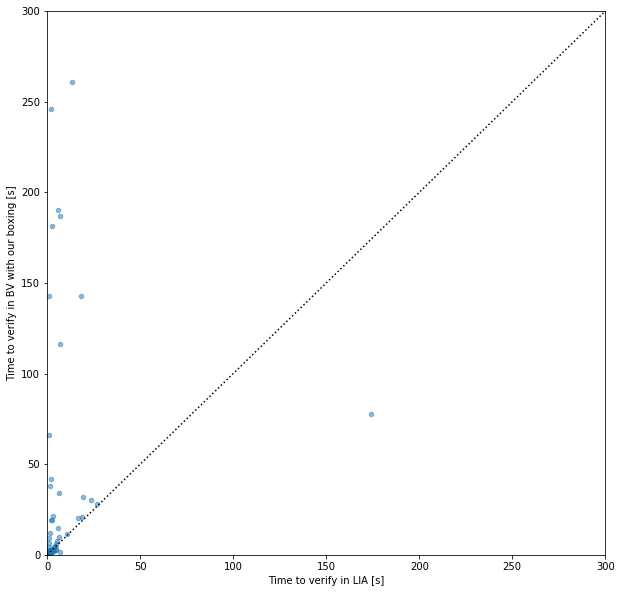

In [30]:
table2.plot.scatter(x='lia', y='boxing', alpha=0.5, figsize=(10, 10), ylim=[0,300], xlim=[0,300])
import numpy as np
xmin = 0
xmax = 600
dx = 100
x = np.arange(xmin, xmax+dx, dx)
y = x
p = plt.plot(x, y, "blue", linestyle='dotted', color="black")
plt.xlabel("Time to verify in LIA [s]")
plt.ylabel("Time to verify in BV with our boxing [s]")
plt.show()

In [31]:
table2["scale"] = table2["boxing"]/table2["lia"]
table2

,targetname,lia,boxing,scale
0,samples/nfm2017/benchmarks/svcomp16/loops/term...,0.904084,0.951828,1.052809
1,samples/nfm2017/benchmarks/svcomp16/loop-accel...,0.860927,2.082447,2.418842
2,samples/lock_small.c,3.130364,2.948922,0.942038
3,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,0.977953,1.011617,1.034422
4,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,0.906943,1.293398,1.426108
...,...,...,...,...
119,samples/nfm2017/benchmarks/svcomp16/loops/sum0...,1.612478,1.050491,0.651476
120,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,1.586654,1.960466,1.235598
121,samples/nfm2017/benchmarks/svcomp16/loop-accel...,1.353311,2.067919,1.528044
122,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,2.354845,1.915244,0.813320


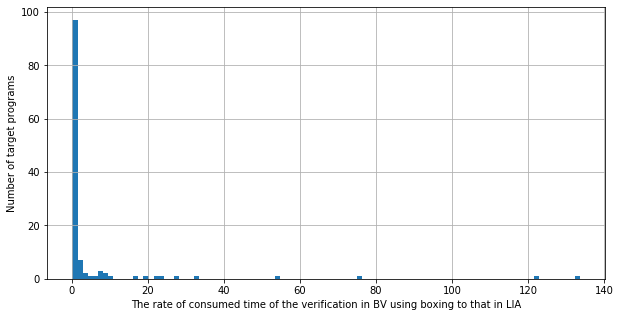

In [32]:
table2["scale"].hist(bins=100, figsize=(10,5))
plt.xlabel("The rate of consumed time of the verification in BV using boxing to that in LIA")
plt.ylabel("Number of target programs")
plt.show()

In [33]:
table2.query("scale < 2")

,targetname,lia,boxing,scale
0,samples/nfm2017/benchmarks/svcomp16/loops/term...,0.904084,0.951828,1.052809
2,samples/lock_small.c,3.130364,2.948922,0.942038
3,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,0.977953,1.011617,1.034422
4,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,0.906943,1.293398,1.426108
5,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,1.327596,1.221379,0.919993
...,...,...,...,...
119,samples/nfm2017/benchmarks/svcomp16/loops/sum0...,1.612478,1.050491,0.651476
120,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,1.586654,1.960466,1.235598
121,samples/nfm2017/benchmarks/svcomp16/loop-accel...,1.353311,2.067919,1.528044
122,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,2.354845,1.915244,0.813320


In [34]:
rows2_rate = []
for i in range(0, 11):
    rows2_rate.append({"bound_slowness": 2**i, "target_programs": len(table2.query(f"scale < {2**i}"))})
table2_rate = pd.DataFrame(rows2_rate)
table2_rate

,bound_slowness,target_programs
0,1,33
1,2,101
2,4,106
3,8,111
4,16,114
5,32,119
6,64,121
7,128,123
8,256,124
9,512,124


In [35]:
table2.mean()

lia        8.420307
boxing    17.918438
scale      5.694179
dtype: float64

In [36]:
import math
rows2_rate = []
fine = 4
r = [i/fine for i in range(-2*fine, 10*fine + 1)]

rows2_rate.append({"bound_slowness": 2**r[0], "target_programs": len(table2.query(f"scale <= {2**(r[0]-1/fine/2)}"))})
for i in r[1:]:
#     print(2**i)
    rows2_rate.append({"bound_slowness": 2**i, "target_programs": len(table2.query(f"{2**(i-1/fine/2)} < scale and scale <= {2**(i+1/fine/2)}"))})
ind2 = [f"x{f(2**i)}" if n%fine==0 else ""  for n, i in enumerate(r)]
table2_rate = pd.DataFrame(rows2_rate, index=ind2)
table2_rate

,bound_slowness,target_programs
x1/4,0.250000,2
,0.297302,0
,0.353553,0
,0.420448,1
x1/2,0.500000,1
,0.594604,2
,0.707107,6
,0.840896,7
x1,1.000000,49
,1.189207,22


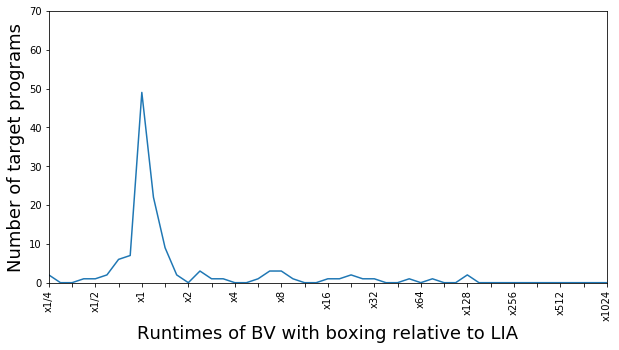

In [37]:
table2_rate["target_programs"].plot.line(x=table2_rate["bound_slowness"], figsize=(10, 5), ylim=[0,70])
plt.xlabel("Runtimes of BV with boxing relative to LIA", fontsize=18)
plt.ylabel("Number of target programs", fontsize=18)
t = 1/2
# plt.rcParams["font.size"] = 18
plt.xticks([n for n, i in enumerate(r) if n % (fine*t) == 0], [i for n, i in enumerate(ind2) if n % (fine*t) == 0], rotation=90)
# plt.show()
plt.savefig("line_slowness_bv_lia.pdf", bbox_inches="tight")

In [38]:
table2_rate.sum()

bound_slowness     6434.737329
target_programs     124.000000
dtype: float64

# interpolantのサイズについて

In [39]:
targetnames3 = []
for i in targetnames:
    rows = data1[data1["targetname"] ==i]
#     print(1 in set(rows["timeout"]))
    if all(pd.isnull(j) for j in rows["error_kind"]) and 1 not in set(rows["timeout"]) and not 0.0 in set(rows["total_sizes_interp"]):
        targetnames3.append(i)

In [40]:
rows3 = []
for i in targetnames3:
    subtable = data1[data1["targetname"]==i]
    size_naive = float(subtable[subtable["lia2bv"] == "naive"]["total_sizes_interp"])
    size_boxing = float(subtable[subtable["lia2bv"] == "boxing"]["total_sizes_interp"])
    time_naive = float(subtable[subtable["lia2bv"] == "naive"]["time"])
    time_boxing = float(subtable[subtable["lia2bv"] == "boxing"]["time"])
    safety = list(subtable["safety"])[0]
    rows3.append({"targetname": i, "naive": size_naive, "boxing": size_boxing, "safety": safety, "naive_time": time_naive, "boxing_time": time_boxing})
#     print(rows1[-1])
# table1 = pd.DataFrame([list(x.values()) for x in rows1], columns={})
table3 = pd.DataFrame(rows3)
table3

,targetname,naive,boxing,safety,naive_time,boxing_time
0,samples/nfm2017/benchmarks/svcomp16/loops/term...,8.0,8.0,unsafe,0.891026,0.951828
1,samples/nfm2017/benchmarks/svcomp16/loop-accel...,14.0,14.0,safe,0.882187,2.082447
2,samples/nfm2017/benchmarks/VeriMAP_bench/INVGE...,69855.0,2802.0,unsafe,148.657984,30.846583
3,samples/lock_small.c,225.0,225.0,safe,3.578315,2.948922
4,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,39.0,39.0,safe,1.056183,1.011617
...,...,...,...,...,...,...
107,samples/nfm2017/benchmarks/VeriMAP_bench/INVGE...,114442.0,3268.0,unsafe,118.543326,24.876148
108,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,153.0,231.0,safe,1.672355,1.960466
109,samples/nfm2017/benchmarks/svcomp16/loop-accel...,390.0,390.0,unsafe,3.145785,2.067919
110,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,904.0,908.0,safe,1.781811,1.915244


In [41]:
table3.sort_values("naive")

,targetname,naive,boxing,safety,naive_time,boxing_time
86,samples/nfm2017/benchmarks/svcomp16/loop-accel...,4.0,4.0,safe,0.800669,0.815857
90,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,5.0,5.0,safe,0.837222,0.831061
7,samples/test3.c,6.0,6.0,safe,1.109592,0.824266
65,samples/nfm2017/benchmarks/VeriMAP_bench/INVGE...,7.0,7.0,unsafe,0.941535,0.937328
25,samples/nfm2017/benchmarks/HOLA/04.c,7.0,7.0,unsafe,0.926151,0.899707
...,...,...,...,...,...,...
56,samples/nfm2017/benchmarks/VeriMAP_bench/INVGE...,238417.0,4923.0,unsafe,550.524519,50.475096
79,samples/01xxx.c,400400.0,453.0,safe,73.608147,1.078796
46,samples/01xx.c,401418.0,463.0,safe,71.381963,1.127499
54,samples/nfm2017/benchmarks/HOLA/42.c,935904.0,1605.0,safe,140.797070,5.874786


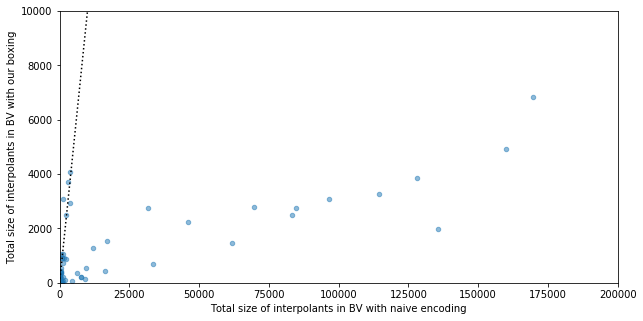

In [42]:
table3.plot.scatter(x='naive', y='boxing', alpha=0.5, figsize=(10, 5), xlim=[0,200000], ylim=[0,10000])
import numpy as np
xmin = 0
xmax = 250000
dx = 100
x = np.arange(xmin, xmax+dx, dx)
y = x
p = plt.plot(x, y, "blue", linestyle='dotted', color="black")
plt.xlabel("Total size of interpolants in BV with naive encoding")
plt.ylabel("Total size of interpolants in BV with our boxing")
plt.show()

In [43]:
table3["scale"] = table3["boxing"]/table3["naive"]

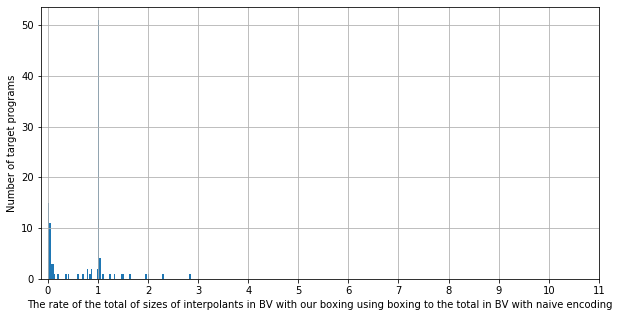

In [44]:
table3["scale"].hist(bins=100, figsize=(10,5))
plt.xlabel("The rate of the total of sizes of interpolants in BV with our boxing using boxing to the total in BV with naive encoding")
plt.ylabel("Number of target programs")
plt.xticks(list(range(12)))
plt.show()

In [45]:
len(table3.query("scale == 1"))

49

In [46]:
table3.mean()

naive          49871.116071
boxing           887.696429
naive_time        35.194823
boxing_time        5.644484
scale              0.741381
dtype: float64

In [47]:
table4 = table3.query("safety == 'safe'")

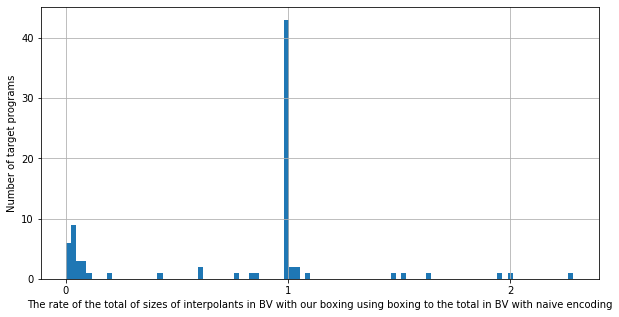

In [48]:
table4["scale"].hist(bins=100, figsize=(10,5))
plt.xlabel("The rate of the total of sizes of interpolants in BV with our boxing using boxing to the total in BV with naive encoding")
plt.ylabel("Number of target programs")
plt.xticks(list(range(3)))
plt.show()

In [49]:
table5 = table3.query("safety == 'unsafe'")

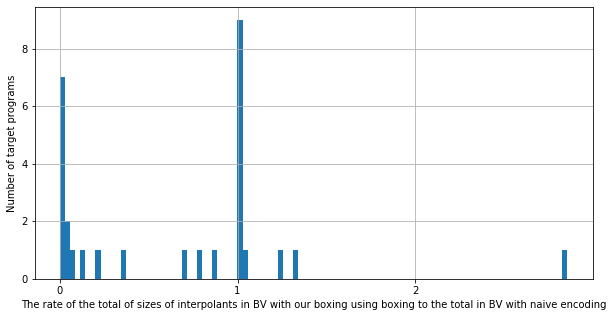

In [50]:
table5["scale"].hist(bins=100, figsize=(10,5))
plt.xlabel("The rate of the total of sizes of interpolants in BV with our boxing using boxing to the total in BV with naive encoding")
plt.ylabel("Number of target programs")
plt.xticks(list(range(3)))
plt.show()

In [51]:
import math
rows3_rate = []
fine = 2
r = [i/fine for i in range(-10*fine, 4*fine + 1)]


rows3_rate.append({"bound_compress": 2**r[0], "target_programs": len(table3.query(f"scale <= {2**(r[0]+1/fine/2)}"))})
for i in r[1:]:
#     print(2**i)
    rows3_rate.append({"bound_compress": 2**i, "target_programs": len(table3.query(f"{2**(i-1/fine/2)} < scale and scale <= {2**(i+1/fine/2)}"))})
ind3 = [f"x{f(2**i)}" if n%fine==0 else ""  for n, i in enumerate(r)]
table3_rate = pd.DataFrame(rows3_rate, index=ind3)
table3_rate

,bound_compress,target_programs
x1/1024,0.000977,3
,0.001381,0
x1/512,0.001953,1
,0.002762,0
x1/256,0.003906,0
,0.005524,0
x1/128,0.007812,0
,0.011049,0
x1/64,0.015625,3
,0.022097,3


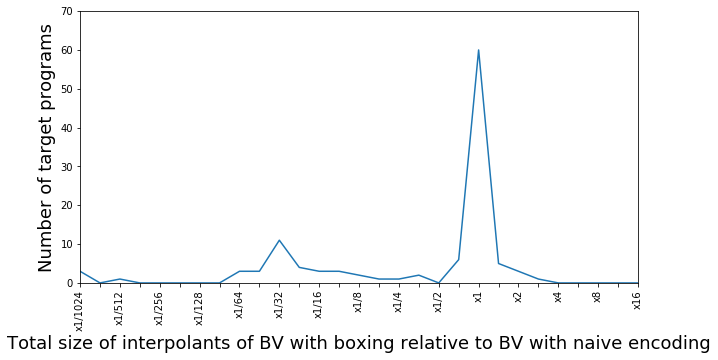

In [52]:
table3_rate["target_programs"].plot.line(x=table3_rate["bound_compress"], figsize=(10, 5), ylim=[0,70])
plt.xlabel("Total size of interpolants of BV with boxing relative to BV with naive encoding", fontsize=18)
plt.ylabel("Number of target programs", fontsize=18)
t = 1/2
# plt.rcParams["font.size"] = 18
plt.xticks([n for n, i in enumerate(r) if n % (fine*t) == 0], [i for n, i in enumerate(ind3) if n % (fine*t) == 0], rotation=90)
# plt.show()
plt.savefig("line_size_interpolant_boxinv_naive.pdf", bbox_inches="tight")

In [53]:
table3_rate.sum()

bound_compress      54.625059
target_programs    112.000000
dtype: float64

In [54]:
table3["scale_time"] = table3["boxing_time"]/table3["naive_time"]

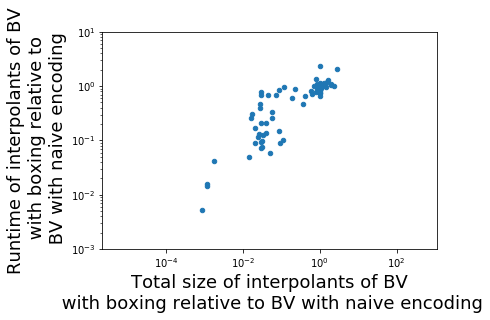

In [55]:
table3.plot.scatter(x="scale", y="scale_time", loglog=True, ylim=[10e-4, 10])
plt.xlabel("Total size of interpolants of BV\n with boxing relative to BV with naive encoding", fontsize=18)
plt.ylabel("Runtime of interpolants of BV\n with boxing relative to\n BV with naive encoding", fontsize=18)
plt.savefig("scatter_time_size_naive_boxing.pdf", bbox_inches="tight")

In [56]:
math.log(1/32, 10)

-1.5051499783199058

# table

In [57]:
solved = data[pd.isnull(data["error_kind"]) == True]
solved = solved.query("timeout == 0")
# solved = solved.query("safety == 'safe' or safety == 'unsafe'")
solved

,targetname,theory,bitwidth,lia2bv,id,safety,time,timeout,error_kind,time_verify,...,time_process_lia,time_to_lia,time_from_lia,total_sizes_interp,num_smt,num_interp,num_boxing,num_boxing_multi_variable,num_interp_failure,zipname
0,samples/nfm2017/benchmarks/VeriMAP_bench/DAGGE...,lia,0,dummy,0,safe,21.744573,0,NaN,20.361911,...,0.005951,0.000000,0.000000,1024.0,6280.0,33.0,0.0,0.0,0.0,20191023104220-172-31-12-181_f7b126ffd6b3_inte...
1,samples/nfm2017/benchmarks/svcomp16/loops/sum0...,lia,0,dummy,0,safe,1.612478,0,NaN,0.756442,...,0.000925,0.000000,0.000000,104.0,208.0,4.0,0.0,0.0,0.0,20191023104204-172-31-27-155_17ddc4cfe902_inte...
2,samples/nfm2017/benchmarks/svcomp16/loop-accel...,lia,0,dummy,0,safe,2.027562,0,NaN,0.131551,...,0.000104,0.000000,0.000000,11.0,31.0,2.0,0.0,0.0,0.0,20191023104723-172-31-11-57_72573b907ea2_inter...
3,samples/nfm2017/benchmarks/VeriMAP_bench/DAGGE...,lia,0,dummy,0,safe,95.186685,0,NaN,94.139503,...,0.014149,0.000000,0.000000,2952.0,22629.0,82.0,0.0,0.0,0.0,20191023104332-172-31-4-156_785abd9e2b1e_inter...
5,samples/mod3.c,lia,0,dummy,0,safe,0.902626,0,NaN,0.132467,...,0.000306,0.000000,0.000000,13.0,37.0,2.0,0.0,0.0,0.0,20191023110220-172-31-23-87_8923c568cdd1_inter...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,samples/nfm2017/benchmarks/svcomp16/locks/test...,liabv,8,boxing,0,unsafe,14.928531,0,NaN,9.605460,...,0.014106,0.044581,0.180132,4061.0,5177.0,35.0,0.0,0.0,0.0,20191023105220-172-31-5-61_930ddeb21e0d_interp...
934,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,lia,0,dummy,0,safe,0.906229,0,NaN,0.115121,...,0.000110,0.000000,0.000000,18.0,35.0,2.0,0.0,0.0,0.0,20191023103156-172-31-30-91_9b648e32700c_inter...
935,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,liabv,8,naive,0,safe,0.837222,0,NaN,0.051454,...,0.000049,0.000073,0.000346,5.0,9.0,1.0,0.0,0.0,0.0,20191023103151-172-31-3-145_dc8f6cecb6cc_inter...
936,samples/nfm2017/benchmarks/svcomp16/loop-new/c...,liabv,8,naive,0,safe,81.684629,0,NaN,80.884849,...,0.352400,0.023470,3.804409,16451.0,44442.0,34.0,0.0,0.0,0.0,20191023104329-172-31-7-103_a3dad3056a6b_inter...


In [58]:
list(solved.query("safety != 'safe' and safety != 'unsafe'")["zipname"])
solved = solved.query("safety == 'safe' or safety == 'unsafe'")
solved

,targetname,theory,bitwidth,lia2bv,id,safety,time,timeout,error_kind,time_verify,...,time_process_lia,time_to_lia,time_from_lia,total_sizes_interp,num_smt,num_interp,num_boxing,num_boxing_multi_variable,num_interp_failure,zipname
0,samples/nfm2017/benchmarks/VeriMAP_bench/DAGGE...,lia,0,dummy,0,safe,21.744573,0,NaN,20.361911,...,0.005951,0.000000,0.000000,1024.0,6280.0,33.0,0.0,0.0,0.0,20191023104220-172-31-12-181_f7b126ffd6b3_inte...
1,samples/nfm2017/benchmarks/svcomp16/loops/sum0...,lia,0,dummy,0,safe,1.612478,0,NaN,0.756442,...,0.000925,0.000000,0.000000,104.0,208.0,4.0,0.0,0.0,0.0,20191023104204-172-31-27-155_17ddc4cfe902_inte...
2,samples/nfm2017/benchmarks/svcomp16/loop-accel...,lia,0,dummy,0,safe,2.027562,0,NaN,0.131551,...,0.000104,0.000000,0.000000,11.0,31.0,2.0,0.0,0.0,0.0,20191023104723-172-31-11-57_72573b907ea2_inter...
3,samples/nfm2017/benchmarks/VeriMAP_bench/DAGGE...,lia,0,dummy,0,safe,95.186685,0,NaN,94.139503,...,0.014149,0.000000,0.000000,2952.0,22629.0,82.0,0.0,0.0,0.0,20191023104332-172-31-4-156_785abd9e2b1e_inter...
5,samples/mod3.c,lia,0,dummy,0,safe,0.902626,0,NaN,0.132467,...,0.000306,0.000000,0.000000,13.0,37.0,2.0,0.0,0.0,0.0,20191023110220-172-31-23-87_8923c568cdd1_inter...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,samples/nfm2017/benchmarks/svcomp16/locks/test...,liabv,8,boxing,0,unsafe,14.928531,0,NaN,9.605460,...,0.014106,0.044581,0.180132,4061.0,5177.0,35.0,0.0,0.0,0.0,20191023105220-172-31-5-61_930ddeb21e0d_interp...
934,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,lia,0,dummy,0,safe,0.906229,0,NaN,0.115121,...,0.000110,0.000000,0.000000,18.0,35.0,2.0,0.0,0.0,0.0,20191023103156-172-31-30-91_9b648e32700c_inter...
935,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,liabv,8,naive,0,safe,0.837222,0,NaN,0.051454,...,0.000049,0.000073,0.000346,5.0,9.0,1.0,0.0,0.0,0.0,20191023103151-172-31-3-145_dc8f6cecb6cc_inter...
936,samples/nfm2017/benchmarks/svcomp16/loop-new/c...,liabv,8,naive,0,safe,81.684629,0,NaN,80.884849,...,0.352400,0.023470,3.804409,16451.0,44442.0,34.0,0.0,0.0,0.0,20191023104329-172-31-7-103_a3dad3056a6b_inter...


In [59]:

x = solved.groupby(["lia2bv", "safety"])
x.count()["targetname"].to_csv("count.csv")
x.count()

/home/ashiato45/.local/share/virtualenvs/stat-SZhDe7Jh/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


targetname  theory  bitwidth   id  time  timeout  error_kind  \
lia2bv safety                                                                 
boxing safe            99      99        99   99    99       99           0   
       unsafe          66      66        66   66    66       66           0   
dummy  safe           165     165       165  165   165      165           0   
       unsafe          41      41        41   41    41       41           0   
naive  safe            87      87        87   87    87       87           0   
       unsafe          57      57        57   57    57       57           0   

               time_verify  time_smt  time_smt_pure  ...  time_process_lia  \
lia2bv safety                                        ...                     
boxing safe             99        99             99  ...                99   
       unsafe           66        66             66  ...                66   
dummy  safe            165       165            165  ...               165   
       unsafe           41        41             41  ...                41   
naive  safe             87        87             87  ...                87   
       unsafe           57        57             57  ...                57   

               time_to_lia  time_from_lia  total_sizes_interp  num_smt  \
lia2bv safety                                                            
boxing safe             99             99                  99       99   
       unsafe           66             66                  66       66   
dummy  safe            165            165                 165      165   
       unsafe           41             41                  41       41   
naive  safe             87             87                  87       87   
       unsafe           57             57                  57       57   

               num_interp  num_boxing  num_boxing_multi_variable  \
lia2bv safety                                                      
boxing safe            99          99                         99   
       unsafe          66          66                         66   
dummy  safe           165         165                        165   
       unsafe          41          41                         41   
naive  safe            87          87                         87   
       unsafe          57          57                         57   

               num_interp_failure  zipname  
lia2bv safety                               
boxing safe                    99       99  
       unsafe                  66       66  
dummy  safe                   165      165  
       unsafe                  41       41  
naive  safe                    87       87  
       unsafe                  57       57  

[6 rows x 22 columns]

In [60]:
x.mean().loc[:, ["time", "time_verify", "total_sizes_interp"]].to_csv("mean.csv")
x.mean()

bitwidth  id       time  timeout  time_verify   time_smt  \
lia2bv safety                                                             
boxing safe           8   0  20.000894        0    19.047476  12.895981   
       unsafe         8   0  20.096414        0    18.905526  13.166451   
dummy  safe           0   0  15.098116        0    14.072614   5.181628   
       unsafe         0   0   9.029428        0     7.953239   6.666101   
naive  safe           8   0  30.096543        0    29.181250  22.220576   
       unsafe         8   0  24.182057        0    22.977101  15.617759   

               time_smt_pure  time_interp  time_interp_pure  time_process_lia  \
lia2bv safety                                                                   
boxing safe         4.442206     0.308127          0.059337          0.032313   
       unsafe       0.769384     0.180527          0.026977          0.021035   
dummy  safe         0.736155     0.113016          0.028976          0.002635   
       unsafe       1.125838     0.146442          0.073520          0.002232   
naive  safe         4.093578     0.154403          0.039105          0.010019   
       unsafe       2.155102     0.125345          0.014021          0.002240   

               time_to_lia  time_from_lia  total_sizes_interp      num_smt  \
lia2bv safety                                                                
boxing safe       0.004340       0.859747         6938.121212  2996.090909   
       unsafe     0.003057       1.192967        15246.333333   929.545455   
dummy  safe       0.000000       0.000000          440.921212  3435.224242   
       unsafe     0.000000       0.000000          391.975610  5133.024390   
naive  safe       0.002178       0.782863        32582.643678  1318.402299   
       unsafe     0.002932       1.123268        49138.421053   912.052632   

               num_interp   num_boxing  num_boxing_multi_variable  \
lia2bv safety                                                       
boxing safe     11.696970  1172.292929                 103.646465   
       unsafe    6.787879  1372.136364                 529.696970   
dummy  safe     12.672727     0.000000                   0.000000   
       unsafe    6.780488     0.000000                   0.000000   
naive  safe      7.022989     0.000000                   0.000000   
       unsafe    6.596491     0.000000                   0.000000   

               num_interp_failure  
lia2bv safety                      
boxing safe                   0.0  
       unsafe                 0.0  
dummy  safe                   0.0  
       unsafe                 0.0  
naive  safe                   0.0  
       unsafe                 0.0

In [61]:
solved.groupby("lia2bv").mean()

,bitwidth,id,time,timeout,time_verify,time_smt,time_smt_pure,time_interp,time_interp_pure,time_process_lia,time_to_lia,time_from_lia,total_sizes_interp,num_smt,num_interp,num_boxing,num_boxing_multi_variable,num_interp_failure
lia2bv,,,,,,,,,,,,,,,,,,
boxing,8,0,20.039102,0,18.990696,13.004169,2.973077,0.257087,0.046393,0.027802,0.003827,0.993035,10261.406061,2169.472727,9.733333,1252.230303,274.066667,0.0
dummy,0,0,13.890270,0,12.854680,5.477081,0.813713,0.119669,0.037841,0.002555,0.000000,0.000000,431.179612,3773.135922,11.500000,0.000000,0.000000,0.0
naive,8,0,27.755392,0,26.725441,19.606961,3.326265,0.142901,0.029176,0.006940,0.002477,0.917607,39135.972222,1157.555556,6.854167,0.000000,0.000000,0.0


In [62]:
solved.groupby("lia2bv").count()

,targetname,theory,bitwidth,id,safety,time,timeout,error_kind,time_verify,time_smt,...,time_process_lia,time_to_lia,time_from_lia,total_sizes_interp,num_smt,num_interp,num_boxing,num_boxing_multi_variable,num_interp_failure,zipname
lia2bv,,,,,,,,,,,,,,,,,,,,,
boxing,165,165,165,165,165,165,165,0,165,165,...,165,165,165,165,165,165,165,165,165,165
dummy,206,206,206,206,206,206,206,0,206,206,...,206,206,206,206,206,206,206,206,206,206
naive,144,144,144,144,144,144,144,0,144,144,...,144,144,144,144,144,144,144,144,144,144


In [63]:
# なんで下の表とtable1で数がずれてるの？
top = set(table1["targetname"])
bottom = set(solved.query("lia2bv == 'boxing'")["targetname"])
top, bottom

({'samples/01.c',
  'samples/01xx.c',
  'samples/01xxx.c',
  'samples/for.c',
  'samples/free.c',
  'samples/lock_small.c',
  'samples/mod.c',
  'samples/mod_eldarica3.c',
  'samples/nfm2017/benchmarks/HOLA/01.c',
  'samples/nfm2017/benchmarks/HOLA/03.c',
  'samples/nfm2017/benchmarks/HOLA/04.c',
  'samples/nfm2017/benchmarks/HOLA/08.c',
  'samples/nfm2017/benchmarks/HOLA/10.c',
  'samples/nfm2017/benchmarks/HOLA/21.c',
  'samples/nfm2017/benchmarks/HOLA/30.c',
  'samples/nfm2017/benchmarks/HOLA/31.c',
  'samples/nfm2017/benchmarks/HOLA/32.c',
  'samples/nfm2017/benchmarks/HOLA/35.c',
  'samples/nfm2017/benchmarks/HOLA/39.c',
  'samples/nfm2017/benchmarks/HOLA/42.c',
  'samples/nfm2017/benchmarks/HOLA/43.c',
  'samples/nfm2017/benchmarks/HOLA/46.c',
  'samples/nfm2017/benchmarks/VeriMAP_bench/DAGGER-bk-nat_VeriMAP_true.c',
  'samples/nfm2017/benchmarks/VeriMAP_bench/DAGGER-ex2_VeriMAP_true.c',
  'samples/nfm2017/benchmarks/VeriMAP_bench/INVGEN-NetBSD_loop_int_VeriMAP_true.c',
  'sample

In [64]:
top - bottom, bottom - top

(set(),
 {'samples/nfm2017/benchmarks/HOLA/16.c',
  'samples/nfm2017/benchmarks/HOLA/23.c',
  'samples/nfm2017/benchmarks/HOLA/34.c',
  'samples/nfm2017/benchmarks/HOLA/37.c',
  'samples/nfm2017/benchmarks/VeriMAP_bench/DAGGER-bkley_VeriMAP_true.c',
  'samples/nfm2017/benchmarks/VeriMAP_bench/DAGGER-efm_VeriMAP_true.c',
  'samples/nfm2017/benchmarks/VeriMAP_bench/INVGEN-gulwani_cegar2_VeriMAP_true.c',
  'samples/nfm2017/benchmarks/VeriMAP_bench/INVGEN-ken-imp_VeriMAP_true.c',
  'samples/nfm2017/benchmarks/VeriMAP_bench/INVGEN-nested7_VeriMAP_true.c',
  'samples/nfm2017/benchmarks/VeriMAP_bench/INVGEN-svd2_VeriMAP_true.c',
  'samples/nfm2017/benchmarks/llreve/nested-while_merged_unsafe.c',
  'samples/nfm2017/benchmarks/svcomp16/loop-invgen/apache-get-tag_true-unreach-call.i.annot.c',
  'samples/nfm2017/benchmarks/svcomp16/loop-lit/jm2006_true-unreach-call.c.i.annot.c',
  'samples/nfm2017/benchmarks/svcomp16/loops/sum03_false-unreach-call_true-termination.i.annot.c'})

In [65]:
len(top-bottom)

0

In [66]:
solved[solved["targetname"].isin(bottom-top)].sort_values(["targetname", "lia2bv"])

,targetname,theory,bitwidth,lia2bv,id,safety,time,timeout,error_kind,time_verify,...,time_process_lia,time_to_lia,time_from_lia,total_sizes_interp,num_smt,num_interp,num_boxing,num_boxing_multi_variable,num_interp_failure,zipname
551,samples/nfm2017/benchmarks/HOLA/16.c,liabv,8,boxing,0,safe,181.540210,0,NaN,179.415160,...,0.001737,0.000546,19.204857,154389.0,116.0,3.0,218.0,177.0,0.0,20191023110341-172-31-2-43_393e1e8215cc_interp...
756,samples/nfm2017/benchmarks/HOLA/16.c,lia,0,dummy,0,safe,2.405705,0,NaN,0.322808,...,0.000627,0.000000,0.000000,61.0,105.0,3.0,0.0,0.0,0.0,20191023110105-172-31-25-142_1fa158bf18eb_inte...
430,samples/nfm2017/benchmarks/HOLA/23.c,liabv,8,boxing,0,unsafe,172.363050,0,NaN,171.516248,...,0.035827,0.010657,13.264100,208815.0,6890.0,18.0,14543.0,14050.0,0.0,20191023110102-172-31-10-244_132351999f61_inte...
750,samples/nfm2017/benchmarks/HOLA/34.c,liabv,8,boxing,0,safe,96.655415,0,NaN,95.745041,...,0.008811,0.010724,2.161429,31077.0,5152.0,20.0,2833.0,2720.0,0.0,20191023105705-172-31-13-132_28857fc56b72_inte...
630,samples/nfm2017/benchmarks/HOLA/34.c,lia,0,dummy,0,safe,523.255164,0,NaN,522.365469,...,0.039523,0.000000,0.000000,4641.0,76298.0,93.0,0.0,0.0,0.0,20191023110415-172-31-17-194_85024d4e33da_inte...
654,samples/nfm2017/benchmarks/HOLA/37.c,liabv,8,boxing,0,safe,190.273249,0,NaN,189.359775,...,0.779775,0.028801,2.547340,23271.0,37786.0,69.0,13581.0,1051.0,0.0,20191023105818-172-31-22-40_54da109eb310_inter...
905,samples/nfm2017/benchmarks/HOLA/37.c,lia,0,dummy,0,safe,5.850815,0,NaN,3.812045,...,0.002435,0.000000,0.000000,344.0,1389.0,12.0,0.0,0.0,0.0,20191023105524-172-31-7-209_f0af277fed15_inter...
86,samples/nfm2017/benchmarks/VeriMAP_bench/DAGGE...,liabv,8,boxing,0,unsafe,175.910385,0,NaN,174.281400,...,0.008614,0.003885,15.418158,149719.0,896.0,12.0,3266.0,1586.0,0.0,20191023104453-172-31-22-40_8b95d5ec55df_inter...
0,samples/nfm2017/benchmarks/VeriMAP_bench/DAGGE...,lia,0,dummy,0,safe,21.744573,0,NaN,20.361911,...,0.005951,0.000000,0.000000,1024.0,6280.0,33.0,0.0,0.0,0.0,20191023104220-172-31-12-181_f7b126ffd6b3_inte...
688,samples/nfm2017/benchmarks/VeriMAP_bench/DAGGE...,liabv,8,boxing,0,unsafe,310.859762,0,NaN,308.050912,...,0.304279,0.015962,18.643167,278042.0,3735.0,33.0,13934.0,6309.0,0.0,20191023104708-172-31-14-72_f481b245fa9f_inter...


In [67]:
data[data["targetname"].isin(bottom-top)].sort_values(["targetname", "lia2bv"])

,targetname,theory,bitwidth,lia2bv,id,safety,time,timeout,error_kind,time_verify,...,time_process_lia,time_to_lia,time_from_lia,total_sizes_interp,num_smt,num_interp,num_boxing,num_boxing_multi_variable,num_interp_failure,zipname
551,samples/nfm2017/benchmarks/HOLA/16.c,liabv,8,boxing,0,safe,181.540210,0,NaN,179.415160,...,0.001737,0.000546,19.204857,154389.0,116.0,3.0,218.0,177.0,0.0,20191023110341-172-31-2-43_393e1e8215cc_interp...
756,samples/nfm2017/benchmarks/HOLA/16.c,lia,0,dummy,0,safe,2.405705,0,NaN,0.322808,...,0.000627,0.000000,0.000000,61.0,105.0,3.0,0.0,0.0,0.0,20191023110105-172-31-25-142_1fa158bf18eb_inte...
531,samples/nfm2017/benchmarks/HOLA/16.c,liabv,8,naive,0,NaN,216.815160,0,MemoryError,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191023110424-172-31-17-202_bdffa06f2e7e_inte...
430,samples/nfm2017/benchmarks/HOLA/23.c,liabv,8,boxing,0,unsafe,172.363050,0,NaN,171.516248,...,0.035827,0.010657,13.264100,208815.0,6890.0,18.0,14543.0,14050.0,0.0,20191023110102-172-31-10-244_132351999f61_inte...
390,samples/nfm2017/benchmarks/HOLA/23.c,lia,0,dummy,0,NaN,600.133061,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191023110814-172-31-2-209_e078435b540a_inter...
376,samples/nfm2017/benchmarks/HOLA/23.c,liabv,8,naive,0,NaN,600.148079,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191023110811-172-31-16-104_e68b87f7e0bb_inte...
750,samples/nfm2017/benchmarks/HOLA/34.c,liabv,8,boxing,0,safe,96.655415,0,NaN,95.745041,...,0.008811,0.010724,2.161429,31077.0,5152.0,20.0,2833.0,2720.0,0.0,20191023105705-172-31-13-132_28857fc56b72_inte...
630,samples/nfm2017/benchmarks/HOLA/34.c,lia,0,dummy,0,safe,523.255164,0,NaN,522.365469,...,0.039523,0.000000,0.000000,4641.0,76298.0,93.0,0.0,0.0,0.0,20191023110415-172-31-17-194_85024d4e33da_inte...
388,samples/nfm2017/benchmarks/HOLA/34.c,liabv,8,naive,0,NaN,600.115866,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191023110528-172-31-7-209_370830e481c8_inter...
654,samples/nfm2017/benchmarks/HOLA/37.c,liabv,8,boxing,0,safe,190.273249,0,NaN,189.359775,...,0.779775,0.028801,2.547340,23271.0,37786.0,69.0,13581.0,1051.0,0.0,20191023105818-172-31-22-40_54da109eb310_inter...


In [68]:
cross_rows = []
for i in set(solved["targetname"]):
    safety_lia = list(solved.query(f"targetname == '{i}' and lia2bv == 'dummy'")["safety"])
    safety_bv = list(solved.query(f"targetname == '{i}' and lia2bv == 'boxing'")["safety"])
    if len(safety_lia) == 0 or len(safety_bv) == 0:
        continue
    safety_lia = safety_lia[0]
    safety_bv = safety_bv[0]
    cross_rows.append({"targetname": i, "safety_lia": safety_lia, "safety_bv": safety_bv})
cross = pd.DataFrame(cross_rows)
cross

,targetname,safety_lia,safety_bv
0,samples/nfm2017/benchmarks/HOLA/10.c,safe,safe
1,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,safe,unsafe
2,samples/nfm2017/benchmarks/svcomp16/loops/term...,unsafe,unsafe
3,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,safe,safe
4,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,unsafe,unsafe
...,...,...,...
137,samples/nfm2017/benchmarks/svcomp16/loop-accel...,unsafe,unsafe
138,samples/nfm2017/benchmarks/VeriMAP_bench/TRACE...,safe,safe
139,samples/nfm2017/benchmarks/svcomp16/loops/term...,safe,safe
140,samples/nfm2017/benchmarks/svcomp16/loops/sum0...,unsafe,unsafe


In [69]:
cross.groupby(["safety_lia", "safety_bv"]).count().to_csv("cross.csv")
cross.groupby(["safety_lia", "safety_bv"]).count()

targetname
safety_lia safety_bv            
safe       safe               90
           unsafe             17
unsafe     safe                1
           unsafe             34

In [70]:
len(data.query("safety == 'unsafe' and lia2bv=='dummy'"))

41

In [71]:
len(cross)

142